In [6]:
# Load Libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(cowplot)


# Read and process each dataset
binned_data_subset1 <- read.csv("final_chr6_files/chr6_binned_random_unrelateds_IBDcoverage.csv", sep = ",", header = TRUE, stringsAsFactors = FALSE, fill = TRUE, check.names = FALSE, quote = "\"")
binned_data_subset2 <- read.csv("final_chr6_files/chr6_binned_subset_IBDcoverage.csv", sep = ",", header = TRUE, stringsAsFactors = FALSE, fill = TRUE, check.names = FALSE, quote = "\"")

# Define genome-wide median IBD values for each dataset
thresholds <- list(
    subset1 = 0.0309948,
    subset2 = 0.0277666
)

# Define the highlighted region in megabases
highlight_region <- data.frame(
    xmin = 28.48,  
    xmax = 33.45,  
    ymin = -Inf,  
    ymax = Inf  
)

# Define SD regions
sd_subset1 <- data.frame(
	xmin = 0,
	xmax = Inf,
	ymin = 0.0309948 - (2 * 0.0111911),
	ymax = 0.0309948 + (2 * 0.0111911)
)

sd_subset2 <- data.frame(
        xmin = 0,
        xmax = Inf,
        ymin = 0.0277666 - (2 * 0.0118936),
        ymax = 0.0277666 + (2 * 0.0118936) 
)

sds <- list(
    subset1 =  sd_subset1,
    subset2 = sd_subset2
)

# Function to create a plot for each dataset
create_plot <- function(binned_data, title_text, threshold, sd_data) {
    ggplot(binned_data, aes(x = bin / 1e6, y = frequency, group = 1)) +
        geom_line(color = "purple", linewidth = 1) +
        geom_hline(yintercept = threshold, linetype = "dashed", color = "black", linewidth = 0.8) +
        scale_linetype_manual(values = c("Genome-Wide Median IBD" = "dashed")) +
        scale_color_manual(values = c("Pairs" = "purple")) +
        scale_x_continuous(
            breaks = seq(0, max(binned_data$bin / 1e6, na.rm = TRUE), by = 10),
            labels = scales::comma_format(scale = 1)
        ) +
        labs(
            title = NULL,
            x = "Location (Mb) along chromosome 6",
            y = "IBD Frequency"
        ) +
        theme_minimal(base_size = 25) +
	theme(legend.position = "none") +
        geom_rect(data = highlight_region, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax),
                  fill = "gray", alpha = 0.5, inherit.aes = FALSE) +
	geom_rect(data = sd_data, aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax), fill = "pink", alpha = 0.4, inherit.aes = FALSE)
}

# Create plots with specific median and standard deviation IBD values
plot_randoms <- create_plot(binned_data_subset1, "Subset 1 Pairs", thresholds$subset1, sd_subset1)
plot_subset <- create_plot(binned_data_subset2, "Subset 2 Pairs", thresholds$subset2, sd_subset2)

legend_data <- data.frame(
	x = c(1, 2),
	y = c(1, 2),
	group = c("Average IBD per 1000 bases", "Genome-Wide Median IBD")
)

legend_plot <- ggplot(legend_data, aes(x, y, color = group, linetype = group)) +
	geom_line(linewidth = 1) +
	scale_color_manual(values = c("Average IBD per 1000 bases" = "purple", "Genome-Wide Median IBD" = "black")) + 
	scale_linetype_manual(values = c("Genome-Wide Median IBD" = "dashed", "Average IBD per 1000 bases" = "solid")) +
	theme_void() +
	theme(legend.position = "bottom") +
	guides(color = guide_legend(title = NULL), linetype = guide_legend(title = NULL))

legend <- get_legend(legend_plot)

# Arrange plots: 
final_plot <- plot_grid(
    plot_grid(plot_randoms, plot_subset, ncol = 1, labels = c("A", "B"), label_size = 25, label_y = 1.02),
    ncol = 1
)

final_plot_with_legend <- plot_grid(final_plot, legend, ncol = 1, rel_heights = c(1, 0.1))


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's linetype values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's linetype values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


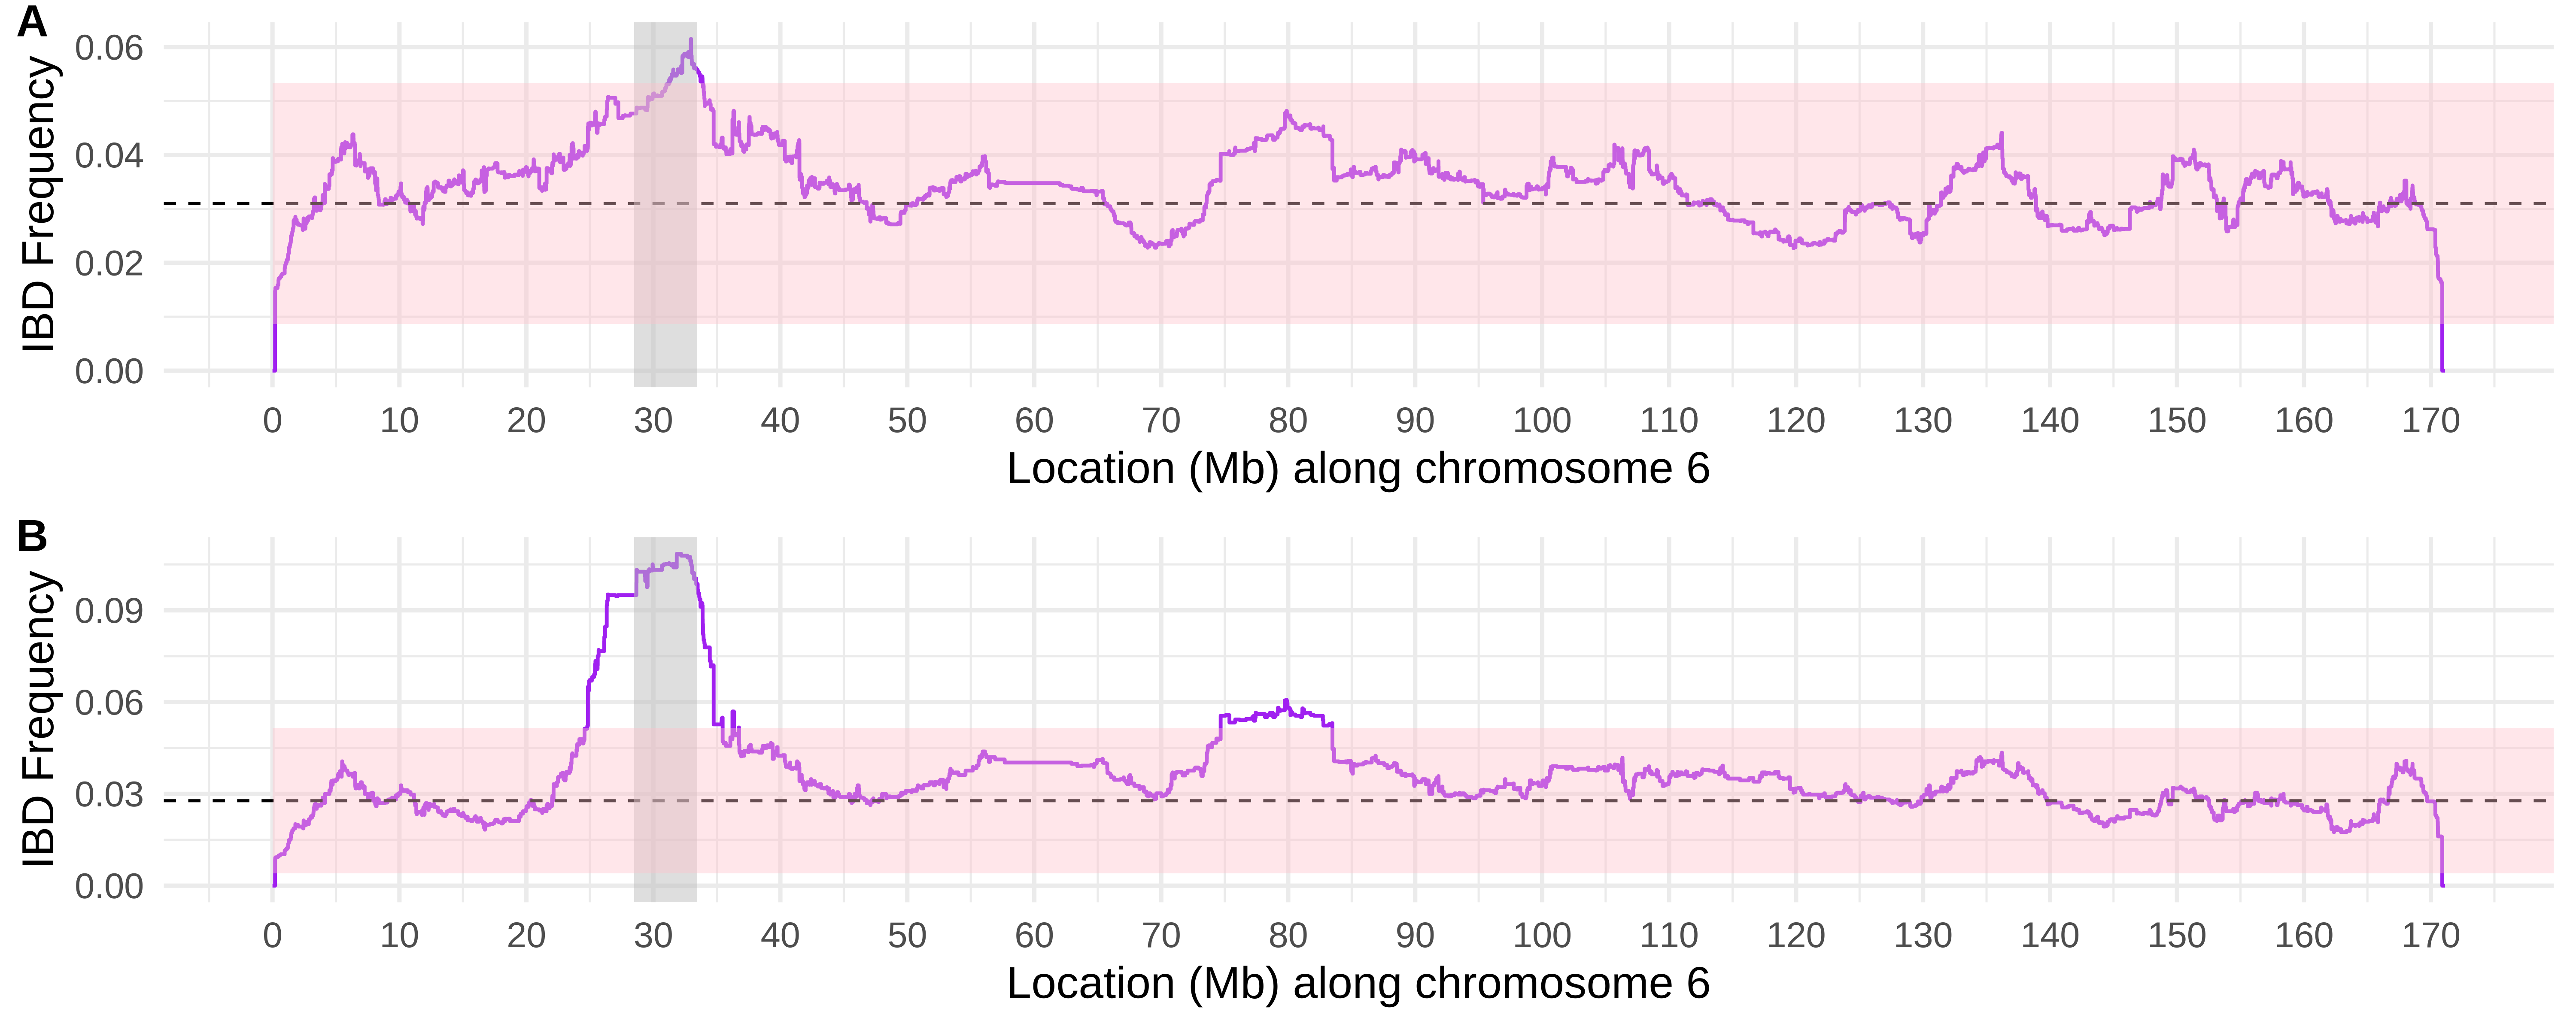

In [7]:
options(repr.plot.width = 20, repr.plot.height = 8, repr.plot.res = 300)

final_plot